<a href="https://colab.research.google.com/github/Mateo289/Cuadernos_S_y_S/blob/main/Taller_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Taller 3**##
##**Ejercicios teorico-practicos: Transformadas de Laplace y Z para el estudio de sistemas lineales e invariantes con el tiempo**

#**Seccion 1:**#
Transformada de Laplace y analisis de sistemas lineales e invariantes con el tiempo

1.1 Consultar y realizar los ejercicios del cuaderno Definicion de transformada de la Laplace.
\
![Ilustración de los polos y ceros en un gráfico de polos y ceros](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/pz_plot.png?raw=1)

####**Interpretación de la gráfica de polos y ceros**

- **Polos**: Hay dos polos en $ s = \pm j1 $, que corresponden a las raíces del denominador de la función.
- **Ceros**: Hay un cero en $ s = 0 $ de segundo orden (indicado por el "2" entre paréntesis), lo que significa que el numerador de la función tiene un término de grado 2 en $ s $.
- **Ganancia**  $K = 2 $: Esta es una constante multiplicativa que afecta la amplitud de la función $ X(s) $.

La forma general de una función racional en la transformada de Laplace es:

$X(s) = K \frac{\text{(ceros en términos de } s\text{)}}{\text{(polos en términos de } s\text{)}}$

Basándonos en la gráfica:

- Cero de segundo orden en $s = 0 $ implica un término $ s^2 $ en el numerador.
- Los polos están en $s = j1 $ y $ s = -j1 $, lo que corresponde a un denominador $ (s - j1)(s + j1) $, o $ s^2 + 1 $ en forma factorizada.

Por lo tanto, la expresión para $ X(s) $ es:

$X(s) = K \frac{s^2}{s^2 + 1}$

Con $ K = 2 $:

$X(s) = 2 \frac{s^2}{s^2 + 1}$

####**Determinar la Región de Convergencia (ROC)**

La Región de Convergencia (ROC) para una función racional como esta depende de los polos. En este caso, los polos están en $ s = \pm j1 $.

Para este tipo de sistemas:

- Si la función representa una respuesta causal, la ROC sería $ \Re(s) > 0 $.
- Si es una respuesta anticausal, la ROC sería $ \Re(s) < 0 $.

Como no se nos proporciona más información, se asume que el sistema es causal, por lo que la ROC sería $ \Re(s) > 0 $.

#### Resultado final:

$X(s) = 2 \frac{s^2}{s^2 + 1}$

$\text{ROC}: \Re(s) > 0$






1.2 Consultar y realizar los ejercicios del cuaderno Propiedades
basicas transformada de la Laplace.
* Determinar los polos y ceros de la transformada de Laplace $\mathsf{L} \{ \epsilon(t) \cdot \sin(\omega_0 t) \}$ mediante el cálculo manual y extendiendo el ejemplo anterior. Qué simetría muestran los polos y los ceros en el plano $s$?
\
\
Ya hemos deducido que la Transformada de Laplace de la señal seno causal
\
$\mathsf{L} \{ \epsilon(t) \cdot \sin(\omega_0 t) \} =   \frac{\omega_0}{s^2 + \omega_0^2} $



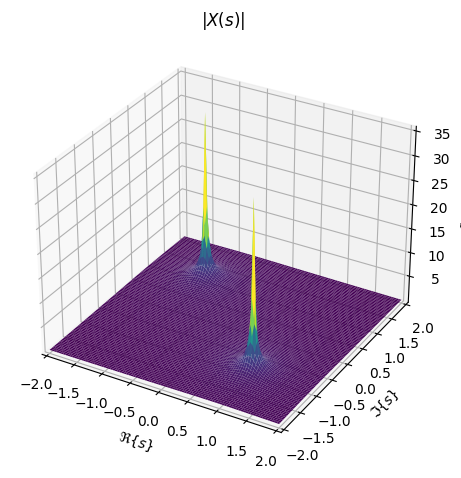

In [9]:
%matplotlib inline
import sympy as sym
import numpy as np
#Graficar la transformada de laplace
s, Wo = sym.symbols(' s Wo', complex = True)
sigma, omega = sym.symbols( 'sigma omega')
X = Wo /(s**2 + Wo**2)
X1 = X.subs({s: sigma+sym.I*omega, Wo: 1+sym.I})
sym.plotting.plot3d(abs(X1), (sigma, -2, 2), (omega, -2, 2), xlabel=r'$\Re\{s\}$', ylabel=r'$\Im\{s\}$', title=r'$|X(s)|$');


Ahora, vamos a identificar los polos y ceros de la funcion de transferencia
\
La expresión queda de la forma:
$X(s) = \frac{\omega_0}{s^2 + \omega_0^2}$

- **Ceros:**
Los ceros de una función de transferencia se encuentran resolviendo el numerador para cuando es igual a cero. En este caso, el numerador es $\omega_0$, que es una constante no nula, por lo que no hay ceros en esta función.
- **Polos:**
Los polos de una función de transferencia se encuentran resolviendo el denominador para cuando es igual a cero:
\
$s^2 + \omega_0^2 = 0$
\
Resolvemos esta ecuacion cuadratica:
\
$s^2 = - \omega_0^2$
\
$s = -+j\omega_0$
\
Por lo tanto, los polos de nuestra funcion de transferencia estan ubicados en:
\
$s =  j\omega_0$ --> $s =  -j\omega_0$



In [10]:
ceros = sym.roots(sym.numer(X),s)
ceros

{}

In [11]:
polos = sym.roots(sym.denom(X),s)
polos

{-I*Wo: 1, I*Wo: 1}

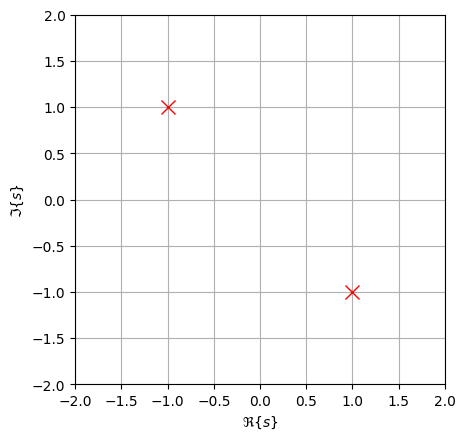

In [12]:
import matplotlib.pyplot as plt

def pole_zero_plot(poles, zeros, ax=None):

    for pole in poles:
        plt.plot(complex(pole).real, complex(pole).imag, 'rx', markersize=10)
    for zero in zeros:
        plt.plot(complex(zero).real, complex(zero).imag, 'bo', markersize=10)

    if ax is None:
        ax = plt.gca()
    ax.set_aspect(1)

    plt.axis([-2, 2, -2, 2])
    plt.xlabel(r'$\Re \{ s \}$')
    plt.ylabel(r'$\Im \{ s \}$')
    plt.grid()
X2 = X.subs(Wo, 1+sym.I)
pole_zero_plot(sym.roots(sym.denom(X2), s), sym.roots(sym.numer(X2), s))

1.3 Demuestre las siguientes propiedades (sin utilizar tablas de
propiedades):
\
1) **$ \mathcal{L} \{ x(t - t_0) \} = e^{-s t_0} X(s) $**

**Demostración:**

Aplicamos la definición de la transformada de Laplace:

$\mathcal{L} \{ x(t - t_0) \} = \int_0^{\infty} x(t - t_0) e^{-st} dt$

Realizando el cambio de variable $ t' = t - t_0 $, obtenemos:

$\mathcal{L} \{ x(t - t_0) \} = e^{-s t_0} \int_0^{\infty} x(t') e^{-s t'} dt' = e^{-s t_0} X(s)$
\
\
2)**$ \mathcal{L} \{ x(at) \} = \frac{1}{|a|} X\left(\frac{s}{a}\right) $**

**Demostración:**

Definimos la transformada de Laplace de $ x(at) $:

$\mathcal{L} \{ x(at) \} = \int_0^{\infty} x(at) e^{-st} dt$

Hacemos el cambio de variable $ u = at $, por lo que $ du = a dt $:

$\mathcal{L} \{ x(at) \} = \frac{1}{|a|} \int_0^{\infty} x(u) e^{-s \frac{u}{a}} du = \frac{1}{|a|} X\left(\frac{s}{a}\right)$
\
\
3)**$ \mathcal{L} \left\{ \frac{dx(t)}{dt} \right\} = s X(s) $**

**Demostración:**

Utilizando la definición de la transformada de Laplace y la integración por partes:

$\mathcal{L} \left\{ \frac{dx(t)}{dt} \right\} = \int_0^{\infty} \frac{dx(t)}{dt} e^{-st} dt$

Aplicando integración por partes:

$\mathcal{L} \left\{ \frac{dx(t)}{dt} \right\} = \left[ x(t) e^{-st} \right]_0^{\infty} + s \int_0^{\infty} x(t) e^{-st} dt = s X(s)$
\
\
4)**$ \mathcal{L} \{ x(t) * y(t) \} = X(s) Y(s) $**

**Demostración:**

Definimos la convolución de $ x(t) * y(t) $:

$(x * y)(t) = \int_0^t x(\tau) y(t - \tau) d\tau$

Aplicamos la transformada de Laplace:
   
$\mathcal{L} \{ x(t) * y(t) \} = \int_0^{\infty} \left( \int_0^t x(\tau) y(t - \tau) d\tau \right) e^{-st} dt$

Aplicando el teorema de convolución, obtenemos:

$\mathcal{L} \{ x(t) * y(t) \} = X(s) Y(s)$

1.4 Encuentre la transformada de Laplace, dibuje el esquema de polos y ceros y la region de convergencia (ROC), de las siguientes senales:
\
\
1.**Señal $ e^{-2t}u(t) + e^{-3t}u(t) $**

La transformada de Laplace de cada término es:

$\mathcal{L} \{ e^{-2t}u(t) \} = \frac{1}{s + 2}, \quad \mathcal{L} \{ e^{-3t}u(t) \} = \frac{1}{s + 3}$

La transformada de Laplace total es:

$X(s) = \frac{1}{s + 2} + \frac{1}{s + 3}$

**Polos**: $ s = -2, s = -3 $

**Ceros**: No hay ceros.

**ROC**: $ \Re(s) > -2 $
\
\
2.**Señal $ e^{2t}u(t) + e^{-3t}u(-t) $**

La transformada de Laplace de los términos es:

$\mathcal{L} \{ e^{2t}u(t) \} = \frac{1}{s - 2}, \quad \mathcal{L} \{ e^{-3t}u(-t) \} = \frac{-1}{s + 3}$

La transformada de Laplace total es:

$X(s) = \frac{1}{s - 2} - \frac{1}{s + 3}$

**Polos**: $ s = 2, s = -3 $

**Ceros**: No hay ceros.

**ROC**: $ -3 < \Re(s) < 2 $
\
\
3.**Señal $ e^{-3t}u(-|t|) $**

Para esta señal simétrica, la transformada de Laplace se obtiene usando la propiedad de la función exponencial con el escalón unitario:

$X(s) = \frac{-2}{s + 3}$

**Polos**: $ s = -3 $

**Ceros**: No hay ceros.

**ROC**: $ \Re(s) < -3 $

4.**Señal $ e^{-2t} [u(t) - u(t - 5)] $**

Esta es una señal truncada entre $ t = 0 $ y $ t = 5 $.
La transformada de Laplace es:

$X(s) = \frac{1 - e^{-5(s + 2)}}{s + 2}$

**Polos**: $ s = -2 $

**Ceros**: Dependen del factor exponencial.

**ROC**: $ \Re(s) > -2 $

1.5 Consultar y realizar los ejercicios del cuaderno Transformada inversa de Laplace.
- Obtener la transformada inversa de Laplace de
 manualmente.

Obtener la transformada inversa de Laplace de
$$  X(s)= \left\{ \frac{1}{(s+1)(s+2)^2} \right\} $$

$ \mathcal{L^1} \left\{\frac{1}{(s+1)(s+2)^2} \right \}    Aplicamos fracciones  parciales $

$\frac{1}{(s+1)(s+2)^2} = \frac{1}{(s+1)} - \frac{1}{(s+2)} - \frac{1}{(s+2)^2}$
\
\
$ \mathcal{L^1} \left\{\frac{1}{(s+1)} - \frac{1}{(s+2)} - \frac{1}{(s+2)^2} \right \}  = \mathcal{L^1} \left\{\frac{1}{(s+1)}  \right \} - \mathcal{L^1} \left\{\frac{1}{(s+2)}\right \} -\mathcal{L^1} \left\{ \frac{1}{(s+2)^2} \right \}  $
\
\
Se halla la tranformada de cada termino y obtenemos:
$\mathcal{L^1} \left\{\frac{1}{(s+1)}\right \} = e^{-t}$
\
$\mathcal{L^1} \left\{\frac{1}{(s+2)}\right \} = e^{-2t}$
\
$\mathcal{L^1} \left\{\frac{1}{(s+2)}\right \} = e^{-2t} * t $
\
Por ultimo, nuestra solucion total es:
$-te^{-2t} + e^{-t} - e^{-2t}$

In [13]:
import sympy as sym
%matplotlib inline
s = sym.symbols('s', complex=True)
t = sym.symbols('t', real=True)

X = (1/((s+1)*(s+2)**2))
X

1/((s + 1)*(s + 2)**2)

In [14]:
polos = sym.roots(sym.denom(X))
polos

{-1: 1, -2: 2}

In [15]:
x1 = sym.inverse_laplace_transform(X, s, t)
x1

-t*exp(-2*t)*Heaviside(t) + exp(-t)*Heaviside(t) - exp(-2*t)*Heaviside(t)

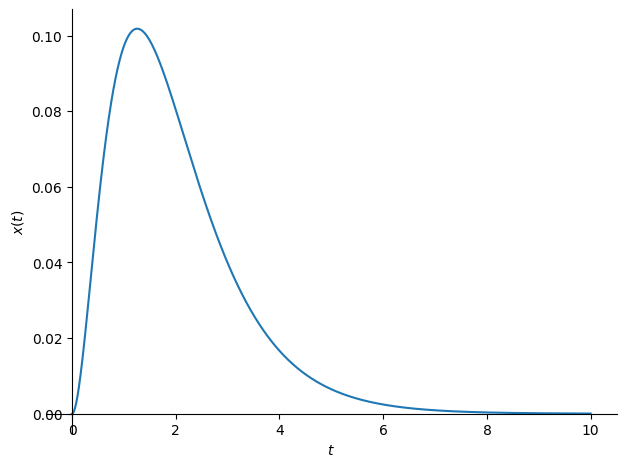

In [16]:
sym.plot(x1, (t, 0, 10), xlabel = '$t$', ylabel = '$x(t)$');

1.6 Consultar y realizar los ejercicios del cuaderno Autofunciones y SLIT

- **A) Relación entre $\lambda$ y la salida obtenida al resolver la EDO**
  
  Dado que la entrada del sistema es $x(t) = e^{st}$, podemos interpretar que el parámetro $\lambda = s$. El término $s$ en la entrada representa la frecuencia compleja de la señal, y por lo tanto, está directamente relacionado con la respuesta del sistema.

Al resolver la ecuación diferencial ordinaria:

$$ a_0 y(t) + a_1 \frac{d y(t)}{dt} + a_2 \frac{d^2 y(t)}{dt^2} = e^{st} $$

La solución general, en el dominio de Laplace, es:

$$ Y(s) = \frac{X(s)}{a_0 + a_1 s + a_2 s^2} $$

Donde $X(s)$ es la transformada de la entrada $x(t)$, es decir, $X(s) = \frac{1}{s - \lambda}$.

Por lo tanto, la salida en el dominio de Laplace es:

$$ Y(s) = \frac{1}{(s - \lambda)(a_0 + a_1 s + a_2 s^2)} $$

Al aplicar la transformada inversa de Laplace, obtenemos la respuesta temporal del sistema, la cual depende de $\lambda$, que está relacionado con la frecuencia de la señal de entrada.

- **B). Generalización a una EDO de orden arbitrario**

El mismo procedimiento se puede generalizar para una EDO de orden arbitrario:

$$ a_0 y(t) + a_1 \frac{d y(t)}{dt} + a_2 \frac{d^2 y(t)}{dt^2} + \cdots + a_n \frac{d^n y(t)}{dt^n} = e^{st} $$

La solución general para este tipo de ecuaciones será:

$$ Y(s) = \frac{1}{(s - \lambda)(a_0 + a_1 s + a_2 s^2 + \cdots + a_n s^n)} $$

Donde la relación entre $\lambda$ y la salida del sistema sigue estando dada por la frecuencia compleja $s$ de la entrada exponencial $e^{st}$.

Este método es aplicable para EDOs de cualquier orden, siempre que se resuelva en el dominio de Laplace.

1.7 Encuentre la funcion de transferencia en lazo abierto para un circuito RLC serie (entrada tension de alimentacion - salida tension en el capacitor) y un circuito RCL en paralelo (entrada corriente de alimentacion - salida corriente en el inductor).
Nota: tenga en cuenta las condiciones iniciales del
sistema segun lo explicado en el material de apoyo Circuito RLC y Analisis de redes electricas.

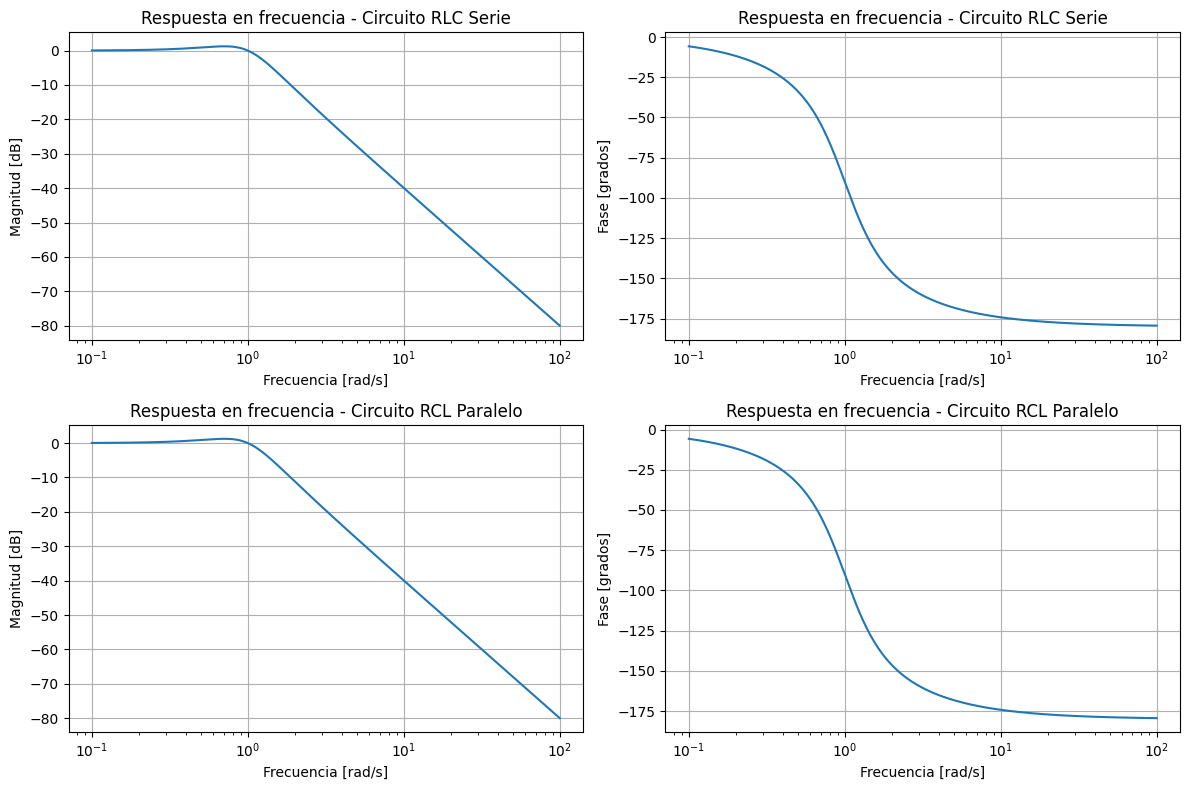

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Definición de parámetros para los circuitos
R = 1.0    # Resistencia en ohmios
L = 1.0    # Inductancia en henrios
C = 1.0    # Capacitancia en faradios

# Función de transferencia para el circuito RLC serie
num_RLC_serie = [1]                # Numerador: 1
den_RLC_serie = [L*C, R*C, 1]      # Denominador: s^2*LC + s*RC + 1
sys_RLC_serie = signal.TransferFunction(num_RLC_serie, den_RLC_serie)

# Función de transferencia para el circuito RCL paralelo
num_RCL_paralelo = [1]             # Numerador: 1
den_RCL_paralelo = [L/R, 1, L*C]   # Denominador: s*L/R + 1 + s^2*LC
sys_RCL_paralelo = signal.TransferFunction(num_RCL_paralelo, den_RCL_paralelo)

# Frecuencias para análisis
frequencias = np.logspace(-1, 2, 500)  # de 0.1 a 100 rad/s

# Respuesta en frecuencia
w, mag_RLC_serie, phase_RLC_serie = signal.bode(sys_RLC_serie, w=frequencias)
w, mag_RCL_paralelo, phase_RCL_paralelo = signal.bode(sys_RCL_paralelo, w=frequencias)

# Gráficos de respuesta en frecuencia
plt.figure(figsize=(12, 8))

# Magnitud del circuito RLC serie
plt.subplot(2, 2, 1)
plt.semilogx(w, mag_RLC_serie)
plt.title('Respuesta en frecuencia - Circuito RLC Serie')
plt.xlabel('Frecuencia [rad/s]')
plt.ylabel('Magnitud [dB]')
plt.grid(True)

# Fase del circuito RLC serie
plt.subplot(2, 2, 2)
plt.semilogx(w, phase_RLC_serie)
plt.title('Respuesta en frecuencia - Circuito RLC Serie')
plt.xlabel('Frecuencia [rad/s]')
plt.ylabel('Fase [grados]')
plt.grid(True)

# Magnitud del circuito RCL paralelo
plt.subplot(2, 2, 3)
plt.semilogx(w, mag_RCL_paralelo)
plt.title('Respuesta en frecuencia - Circuito RCL Paralelo')
plt.xlabel('Frecuencia [rad/s]')
plt.ylabel('Magnitud [dB]')
plt.grid(True)

# Fase del circuito RCL paralelo
plt.subplot(2, 2, 4)
plt.semilogx(w, phase_RCL_paralelo)
plt.title('Respuesta en frecuencia - Circuito RCL Paralelo')
plt.xlabel('Frecuencia [rad/s]')
plt.ylabel('Fase [grados]')
plt.grid(True)

plt.tight_layout()
plt.show()

**1.8 Para las funciones de transferencia en lazo abierto encontradas en el punto anterior, encuentre la expresión de la salida en el tiempo para una configuración en lazo cerrado del sistema, en función de *R, L* y *C,* para las siguientes entradas:
\
*i) impulso, ii) escalón unitario, y iv) rampa*.
\
Compruebe los resultados en simulación sobre Python (utilizando sympy) y grafique la señal de salida para cada caso. Ver cuaderno de ayuda Fracciones parciales Circuito RLC.**

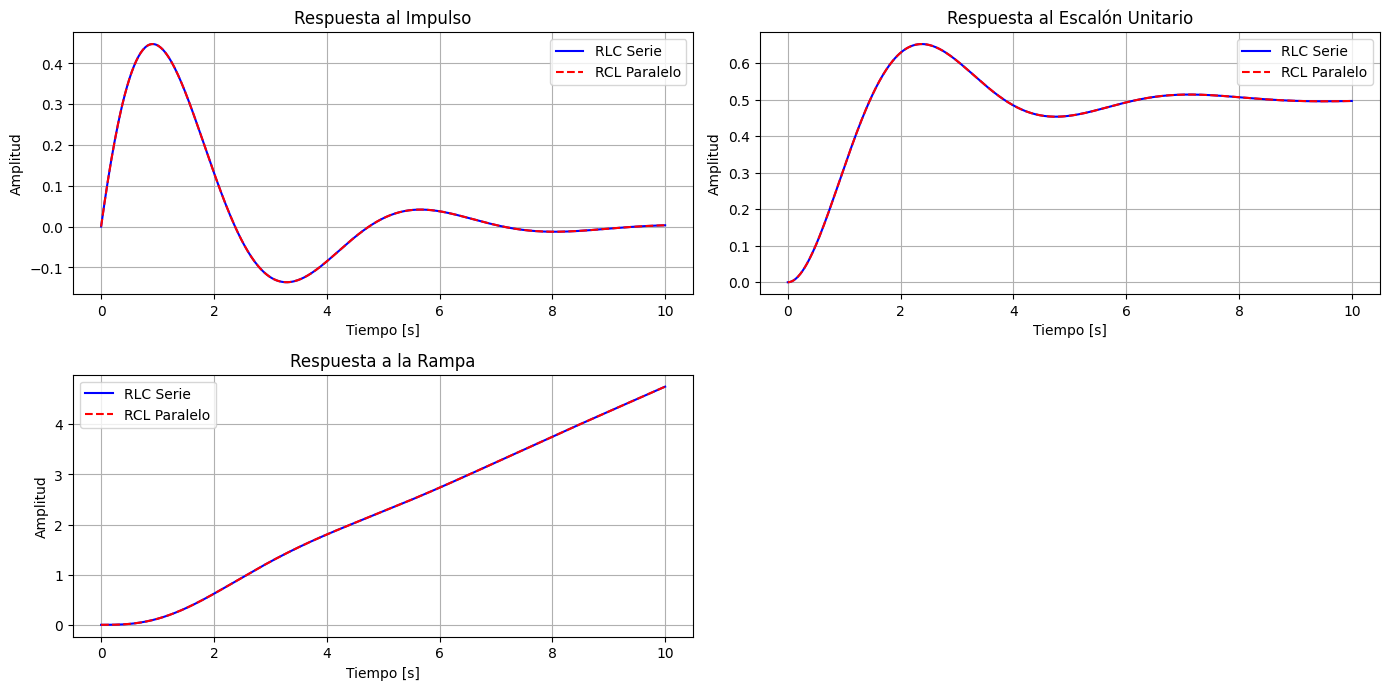

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Function, exp, Heaviside, laplace_transform, inverse_laplace_transform

# Definir variables
t, s = symbols('t s')
R, L, C = symbols('R L C')

# Función de transferencia en lazo cerrado para el circuito RLC serie
H_closed_RLC_serie = 1 / (s**2 * L * C + s * R * C + 2)

# Función de transferencia en lazo cerrado para el circuito RCL paralelo
H_closed_RCL_paralelo = 1 / (s * L / R + 2 + s**2 * L * C)

# Definir las entradas
X_impulso = 1
X_escalon = 1 / s
X_rampa = 1 / s**2

# Calcular respuestas en el tiempo para cada entrada y circuito
Y_impulso_RLC_serie = inverse_laplace_transform(H_closed_RLC_serie * X_impulso, s, t)
Y_impulso_RCL_paralelo = inverse_laplace_transform(H_closed_RCL_paralelo * X_impulso, s, t)

Y_escalon_RLC_serie = inverse_laplace_transform(H_closed_RLC_serie * X_escalon, s, t)
Y_escalon_RCL_paralelo = inverse_laplace_transform(H_closed_RCL_paralelo * X_escalon, s, t)

Y_rampa_RLC_serie = inverse_laplace_transform(H_closed_RLC_serie * X_rampa, s, t)
Y_rampa_RCL_paralelo = inverse_laplace_transform(H_closed_RCL_paralelo * X_rampa, s, t)

# Evaluar respuestas en el tiempo para un rango de t
t_vals = np.linspace(0, 10, 500)

# Define numerical values for R, L, and C
R_val = 1.0
L_val = 1.0
C_val = 1.0

y_impulso_RLC_serie = [Y_impulso_RLC_serie.evalf(subs={t: val, R: R_val, L: L_val, C: C_val}) for val in t_vals]
y_impulso_RCL_paralelo = [Y_impulso_RCL_paralelo.evalf(subs={t: val, R: R_val, L: L_val, C: C_val}) for val in t_vals]
y_escalon_RLC_serie = [Y_escalon_RLC_serie.evalf(subs={t: val, R: R_val, L: L_val, C: C_val}) for val in t_vals]
y_escalon_RCL_paralelo = [Y_escalon_RCL_paralelo.evalf(subs={t: val, R: R_val, L: L_val, C: C_val}) for val in t_vals]
y_rampa_RLC_serie = [Y_rampa_RLC_serie.evalf(subs={t: val, R: R_val, L: L_val, C: C_val}) for val in t_vals]
y_rampa_RCL_paralelo = [Y_rampa_RCL_paralelo.evalf(subs={t: val, R: R_val, L: L_val, C: C_val}) for val in t_vals]

# Graficar respuestas en el tiempo
plt.figure(figsize=(14, 10))


# Impulso
plt.subplot(3, 2, 1)
plt.plot(t_vals, y_impulso_RLC_serie, label='RLC Serie', color='blue')
plt.plot(t_vals, y_impulso_RCL_paralelo, label='RCL Paralelo', color='red', linestyle='--')
plt.title('Respuesta al Impulso')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

# Escalón unitario
plt.subplot(3, 2, 2)
plt.plot(t_vals, y_escalon_RLC_serie, label='RLC Serie', color='blue')
plt.plot(t_vals, y_escalon_RCL_paralelo, label='RCL Paralelo', color='red', linestyle='--')
plt.title('Respuesta al Escalón Unitario')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

# Rampa
plt.subplot(3, 2, 3)
plt.plot(t_vals, y_rampa_RLC_serie, label='RLC Serie', color='blue')
plt.plot(t_vals, y_rampa_RCL_paralelo, label='RCL Paralelo', color='red', linestyle='--')
plt.title('Respuesta a la Rampa')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**1.9 Consulte en qué consiste un sistema subamortiguado, sobre-amortiguado, y de amortiguamiento crítico. Genere simulaciones para ejemplificar cada uno de los casos con los sistemas R,L ,C serie y paralelo estudiados. Nota: asuma condiciones iniciales cero.**

**Sistema Subamortiguado:**

**Descripción:** Un sistema es subamortiguado si tiene un amortiguamiento insuficiente. La respuesta muestra oscilaciones antes de alcanzar el estado estable. La razón de las oscilaciones es que los polos del sistema están en el semiplano izquierdo, pero no están en la parte real (es decir, tienen parte imaginaria no nula).

**Condiciones:** La relación entre el coeficiente de amortiguamiento $(ζ)$ y la frecuencia natural $(𝜔_n)$ es tal que $0 < 𝜁 <1$

**Sistema Sobreamortiguado:**

**Descripción:** Un sistema es sobreamortiguado si el amortiguamiento es excesivo. La respuesta vuelve al estado estable sin oscilaciones, pero más lentamente que en el caso de amortiguamiento crítico. En este caso, los polos están en el semiplano izquierdo, y ambos tienen parte real negativa.

**Condiciones:** La relación entre el coeficiente de amortiguamiento $(𝜁)$ y la frecuencia natural $(𝜔_n)$ es tal que$ ζ >1.$

**Sistema de Amortiguamiento Crítico:**

**Descripción:** Un sistema tiene amortiguamiento crítico cuando el amortiguamiento es justo suficiente para evitar las oscilaciones, pero no tan alto como para hacer que la respuesta sea excesivamente lenta. La respuesta es la más rápida posible sin oscilaciones.

**Condiciones:** La relación entre el coeficiente de amortiguamiento $(ζ)$ y la frecuencia natural $(w_n)$ es tal que $ζ=1.$

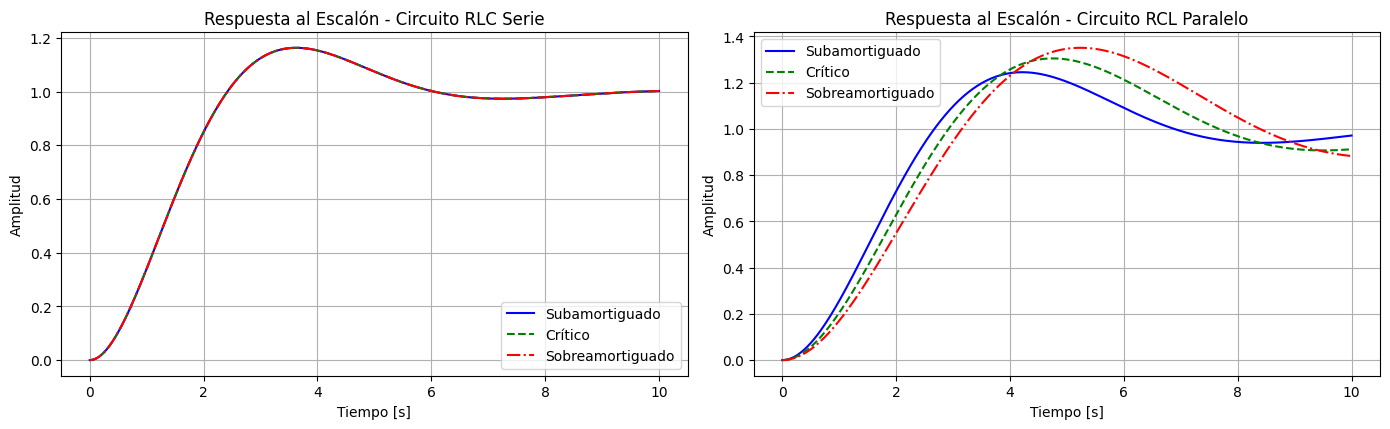

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Definir parámetros del circuito
R = 1.0    # Resistencia en ohmios
L = 1.0    # Inductancia en henrios
C = 1.0    # Capacitancia en faradios

# Cálculo de parámetros de amortiguamiento
omega_n = 1 / np.sqrt(L * C)  # Frecuencia natural
zeta_subamortiguado = 0.5  # Coeficiente de amortiguamiento subamortiguado
zeta_critico = 1.0  # Coeficiente de amortiguamiento crítico
zeta_sobreamortiguado = 1.5  # Coeficiente de amortiguamiento sobreamortiguado

# Función de transferencia para circuito RLC serie
def tf_RLC_serie(zeta):
    num = [1]
    den = [L * C, R * C, 1]
    sys = signal.TransferFunction(num, den)
    return sys

# Función de transferencia para circuito RCL paralelo
def tf_RCL_paralelo(zeta):
    num = [1]
    den = [L/R + zeta * omega_n, 1, L * C]
    sys = signal.TransferFunction(num, den)
    return sys

# Tiempo de simulación
t = np.linspace(0, 10, 500)

# Respuestas en el tiempo para el circuito RLC serie
sys_serie_subamortiguado = tf_RLC_serie(zeta_subamortiguado)
sys_serie_critico = tf_RLC_serie(zeta_critico)
sys_serie_sobreamortiguado = tf_RLC_serie(zeta_sobreamortiguado)

#The signal.step function returns a tuple of two values when the system is continuous
t, y_serie_subamortiguado = signal.step(sys_serie_subamortiguado, T=t)
t, y_serie_critico = signal.step(sys_serie_critico, T=t)
t, y_serie_sobreamortiguado = signal.step(sys_serie_sobreamortiguado, T=t)

# Respuestas en el tiempo para el circuito RCL paralelo
sys_paralelo_subamortiguado = tf_RCL_paralelo(zeta_subamortiguado)
sys_paralelo_critico = tf_RCL_paralelo(zeta_critico)
sys_paralelo_sobreamortiguado = tf_RCL_paralelo(zeta_sobreamortiguado)

t, y_paralelo_subamortiguado = signal.step(sys_paralelo_subamortiguado, T=t)
t, y_paralelo_critico = signal.step(sys_paralelo_critico, T=t)
t, y_paralelo_sobreamortiguado = signal.step(sys_paralelo_sobreamortiguado, T=t)

# Graficar respuestas en el tiempo
plt.figure(figsize=(14, 12))


# Respuesta al escalón - Circuito RLC Serie
plt.subplot(3, 2, 1)
plt.plot(t, y_serie_subamortiguado, label='Subamortiguado', color='blue')
plt.plot(t, y_serie_critico, label='Crítico', color='green', linestyle='--')
plt.plot(t, y_serie_sobreamortiguado, label='Sobreamortiguado', color='red', linestyle='-.')
plt.title('Respuesta al Escalón - Circuito RLC Serie')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

# Respuesta al escalón - Circuito RCL Paralelo
plt.subplot(3, 2, 2)
plt.plot(t, y_paralelo_subamortiguado, label='Subamortiguado', color='blue')
plt.plot(t, y_paralelo_critico, label='Crítico', color='green', linestyle='--')
plt.plot(t, y_paralelo_sobreamortiguado, label='Sobreamortiguado', color='red', linestyle='-.')
plt.title('Respuesta al Escalón - Circuito RCL Paralelo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**1.10 Para los sitemas del punto 1.9, encuentre las expresiones para el factor de amortiguamiento §, la frecuencia natural no amortiguada $W_n$, y la frecuencia natural amortiguada $W_a$ en función de R, L, y C. Nota: asuma condiciones iniciales cero.**

In [20]:
import numpy as np

# Definir parámetros
R = 1.0  # Resistencia en ohmios
L = 1.0  # Inductancia en henrios
C = 1.0  # Capacitancia en faradios

# Calcular frecuencia natural no amortiguada
omega_n = 1 / np.sqrt(L * C)

# Calcular factor de amortiguamiento
zeta = R / (2 * np.sqrt(L / C))

# Calcular frecuencia natural amortiguada
omega_a = omega_n * np.sqrt(1 - zeta**2)

print(f"Frecuencia Natural No Amortiguada (\omega_n): {omega_n:.2f} rad/s")
print(f"Factor de Amortiguamiento (zeta): {zeta:.2f}")
print(f"Frecuencia Natural Amortiguada (omega_a): {omega_a:.2f} rad/s")

Frecuencia Natural No Amortiguada (\omega_n): 1.00 rad/s
Factor de Amortiguamiento (zeta): 0.50
Frecuencia Natural Amortiguada (omega_a): 0.87 rad/s
